In [82]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# Load the CSV file
df = pd.read_csv('synthetic_data.csv')
df

,Date,Shown,Clicked,Converted,Avg_cost_per_click,Total_revenue,Ad_group,Region,Device_type,CTR
0,01-01-2015,92872,1741,57,1.09,853.47,ad_group_5,Europe,Mobile,0.0187
1,02-01-2015,70159,4364,37,1.12,1035.79,ad_group_4,Asia,Mobile,0.0622
2,03-01-2015,85509,3549,59,0.93,925.85,ad_group_3,Asia,Mobile,0.0415
3,04-01-2015,80173,3205,33,1.03,692.53,ad_group_4,Asia,Desktop,0.0400
4,05-01-2015,84615,4151,37,1.06,570.72,ad_group_2,Europe,Mobile,0.0491
...,...,...,...,...,...,...,...,...,...,...
1995,18-06-2020,72629,4566,33,1.09,435.50,ad_group_3,North America,Desktop,0.0629
1996,19-06-2020,77257,3330,62,0.90,1132.28,ad_group_5,Europe,Desktop,0.0431
1997,20-06-2020,62901,3507,38,1.19,790.17,ad_group_4,North America,Desktop,0.0558
1998,21-06-2020,53863,3431,31,1.14,722.23,ad_group_2,North America,Desktop,0.0637


In [84]:
print(df.columns)  # Check the actual column names
df.columns = df.columns.str.strip().str.lower()  # Normalize column names to lowercase
categorical_cols = ['ad_group', 'region', 'device_type']  # Adjust accordingly
print(df.columns)

Index(['Date', 'Shown', 'Clicked', 'Converted', 'Avg_cost_per_click',
       'Total_revenue', 'Ad_group', 'Region', 'Device_type', 'CTR'],
      dtype='object')
Index(['date', 'shown', 'clicked', 'converted', 'avg_cost_per_click',
       'total_revenue', 'ad_group', 'region', 'device_type', 'ctr'],
      dtype='object')


date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad_group              0
region                0
device_type           0
ctr                   0
dtype: int64


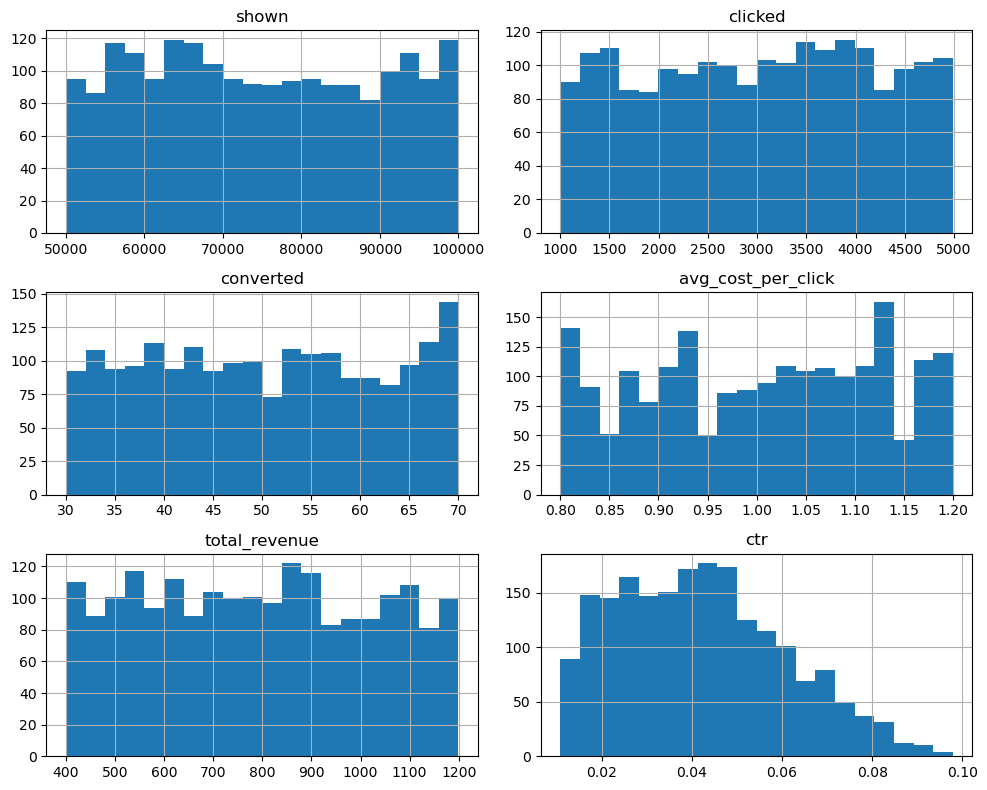

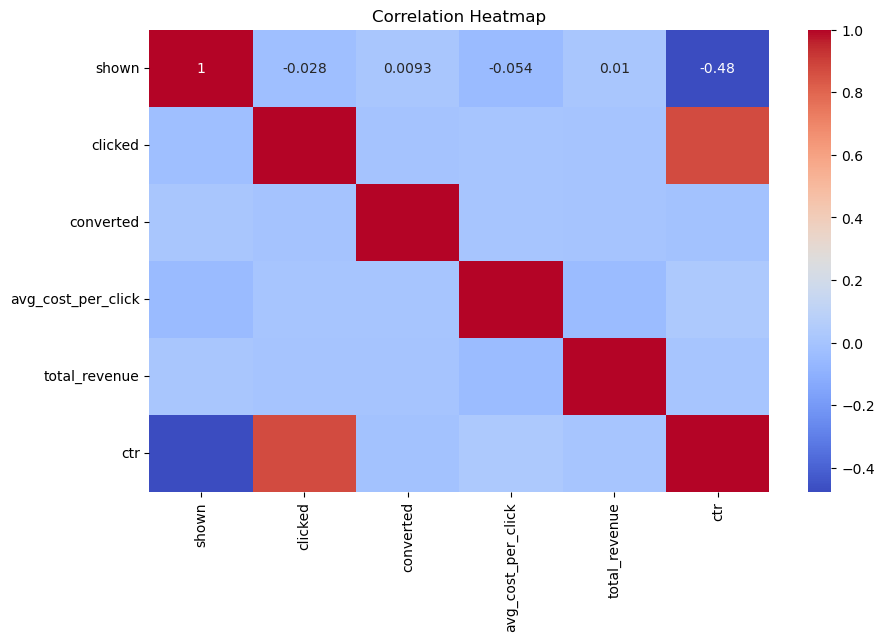

In [85]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Plotting distribution of numerical columns
numerical_cols = ['shown', 'clicked', 'converted', 'avg_cost_per_click', 'total_revenue', 'ctr']
df[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [86]:
# Feature Engineering
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Ensure columns have unique names
df = df.loc[:, ~df.columns.duplicated()]

# Convert 'date' to datetime and extract features
if 'date' in df.columns:
    df = df.copy()  # Ensure working on a copy
    df['Date'] = pd.to_datetime(df['date'], dayfirst=True)  # Specify dayfirst=True for DD-MM-YYYY format
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
else:
    print("Column 'date' is missing!")

# Check for 'clicked' and 'shown' before calculating CTR
if 'clicked' in df.columns and 'shown' in df.columns:
    df['CTR'] = df['clicked'] / df['shown']
else:
    print("Columns 'clicked' or 'shown' are missing!")

# One-hot encode categorical features
categorical_cols = ['ad_group_ad_group_2', 'ad_group_ad_group_3', 'ad_group_ad_group_4', 'ad_group_ad_group_5',
                    'region_europe', 'region_north america', 'region_south america', 'device_type_mobile']

missing_cols = [col for col in categorical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: Missing columns {missing_cols} in the DataFrame.")
else:
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use 'sparse_output' for compatibility
    encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                           columns=encoder.get_feature_names_out())
    df = pd.concat([df, encoded], axis=1).drop(categorical_cols, axis=1)

# Verify the result
print(df.head())




         date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  01-01-2015  92872     1741         57                1.09         853.47   
1  02-01-2015  70159     4364         37                1.12        1035.79   
2  03-01-2015  85509     3549         59                0.93         925.85   
3  04-01-2015  80173     3205         33                1.03         692.53   
4  05-01-2015  84615     4151         37                1.06         570.72   

     ad_group  region device_type     ctr       Date  Day  Month  Year  \
0  ad_group_5  Europe      Mobile  0.0187 2015-01-01    1      1  2015   
1  ad_group_4    Asia      Mobile  0.0622 2015-01-02    2      1  2015   
2  ad_group_3    Asia      Mobile  0.0415 2015-01-03    3      1  2015   
3  ad_group_4    Asia     Desktop  0.0400 2015-01-04    4      1  2015   
4  ad_group_2  Europe      Mobile  0.0491 2015-01-05    5      1  2015   

        CTR  
0  0.018746  
1  0.062202  
2  0.041504  
3  0.039976  
4  0.04905

In [88]:
# Train-Test Split

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['converted', 'date'])
y = df['converted']  # Target variable: Converted

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [106]:
# Train Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Example: Load your dataset (assuming X and y are already defined)
# X = your_feature_data
# y = your_target_data

# Split data into train and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can change strategy to 'median' or 'most_frequent' if needed

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data (using the same imputer fitted on the training data)
X_test_imputed = imputer.transform(X_test)

# Train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Predictions
y_pred = rf_model.predict(X_test_imputed)
y_pred_proba = rf_model.predict_proba(X_test_imputed)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

          30       0.00      0.00      0.00        10
          31       0.00      0.00      0.00        10
          32       0.00      0.00      0.00        11
          33       0.08      0.11      0.09         9
          34       0.25      0.09      0.13        11
          35       0.00      0.00      0.00        11
          36       0.00      0.00      0.00        11
          37       0.00      0.00      0.00         7
          38       0.00      0.00      0.00        13
          39       0.00      0.00      0.00         9
          40       0.00      0.00      0.00         7
          41       0.10      0.08      0.09        13
          42       0.00      0.00      0.00         8
          43       0.00      0.00      0.00         9
          44       0.00      0.00      0.00        14
          45       0.10      0.07      0.08        14
          46       0.00      0.00      0.00         9
   

Shape of X_train_imputed: (1600, 10)
Feature names length: 10
Feature importances length: 10


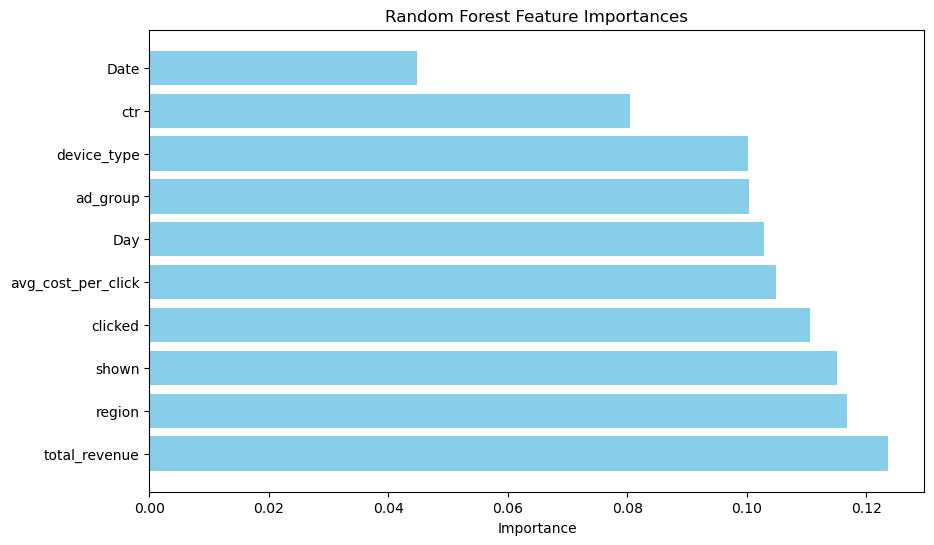

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the model was trained on 10 features (X_train_imputed shape)
print("Shape of X_train_imputed:", X_train_imputed.shape)

# Check if the number of columns matches the importances length
feature_names = X.columns[:X_train_imputed.shape[1]]  # Use only the relevant columns (based on imputation)

# Check if feature names length matches the importances length
print(f"Feature names length: {len(feature_names)}")
print(f"Feature importances length: {len(rf_model.feature_importances_)}")

# Now create the DataFrame for feature importances based on the matching number of features
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


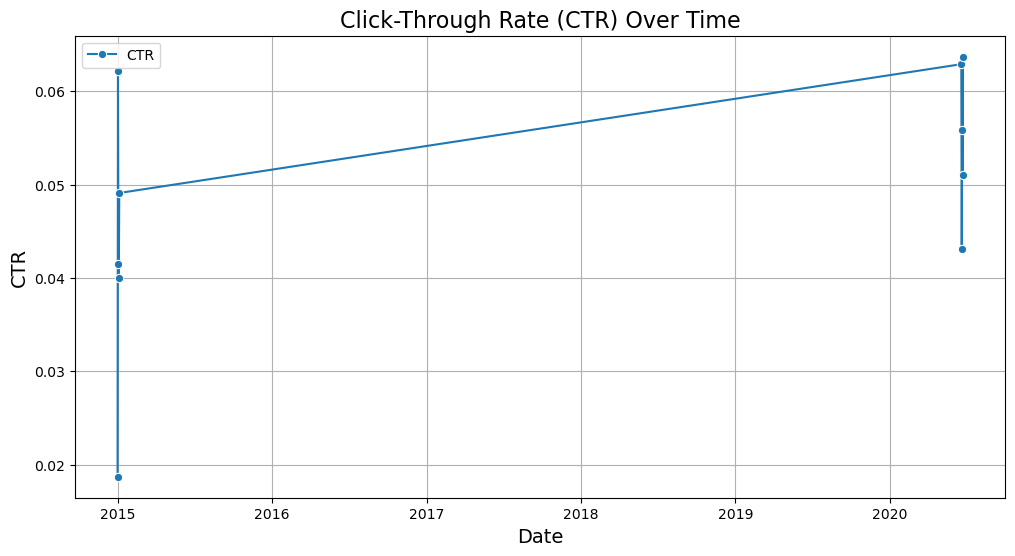

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
data = pd.DataFrame({
    'Date': ['01-01-2015', '02-01-2015', '03-01-2015', '04-01-2015', '05-01-2015',
             '18-06-2020', '19-06-2020', '20-06-2020', '21-06-2020', '22-06-2020'],
    'Shown': [92872, 70159, 85509, 80173, 84615, 72629, 77257, 62901, 53863, 69518],
    'Clicked': [1741, 4364, 3549, 3205, 4151, 4566, 3330, 3507, 3431, 3542],
    'Converted': [57, 37, 59, 33, 37, 33, 62, 38, 31, 36],
    'Avg_cost_per_click': [1.09, 1.12, 0.93, 1.03, 1.06, 1.09, 0.90, 1.19, 1.14, 1.16],
    'Total_revenue': [853.47, 1035.79, 925.85, 692.53, 570.72, 435.50, 1132.28, 790.17, 722.23, 837.72],
    'Ad_group': ['ad_group_5', 'ad_group_4', 'ad_group_3', 'ad_group_4', 'ad_group_2', 
                 'ad_group_3', 'ad_group_5', 'ad_group_4', 'ad_group_2', 'ad_group_4'],
    'Region': ['Europe', 'Asia', 'Asia', 'Asia', 'Europe', 
               'North America', 'Europe', 'North America', 'North America', 'North America'],
    'Device_type': ['Mobile', 'Mobile', 'Mobile', 'Desktop', 'Mobile', 
                    'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Mobile'],
    'CTR': [0.0187, 0.0622, 0.0415, 0.0400, 0.0491, 0.0629, 0.0431, 0.0558, 0.0637, 0.0510]
})

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Sort data by date
data = data.sort_values(by='Date')

# Plotting CTR over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='CTR', data=data, marker='o', label='CTR')
plt.title('Click-Through Rate (CTR) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('CTR', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()



In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.DataFrame({
    'Date': ['01-01-2015', '02-01-2015', '03-01-2015', '04-01-2015', '05-01-2015',
             '18-06-2020', '19-06-2020', '20-06-2020', '21-06-2020', '22-06-2020'],
    'Shown': [92872, 70159, 85509, 80173, 84615, 72629, 77257, 62901, 53863, 69518],
    'Clicked': [1741, 4364, 3549, 3205, 4151, 4566, 3330, 3507, 3431, 3542],
    'Converted': [57, 37, 59, 33, 37, 33, 62, 38, 31, 36],
    'Avg_cost_per_click': [1.09, 1.12, 0.93, 1.03, 1.06, 1.09, 0.90, 1.19, 1.14, 1.16],
    'Total_revenue': [853.47, 1035.79, 925.85, 692.53, 570.72, 435.50, 1132.28, 790.17, 722.23, 837.72],
    'Ad_group': ['ad_group_5', 'ad_group_4', 'ad_group_3', 'ad_group_4', 'ad_group_2', 
                 'ad_group_3', 'ad_group_5', 'ad_group_4', 'ad_group_2', 'ad_group_4'],
    'Region': ['Europe', 'Asia', 'Asia', 'Asia', 'Europe', 
               'North America', 'Europe', 'North America', 'North America', 'North America'],
    'Device_type': ['Mobile', 'Mobile', 'Mobile', 'Desktop', 'Mobile', 
                    'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Mobile'],
    'CTR': [0.0187, 0.0622, 0.0415, 0.0400, 0.0491, 0.0629, 0.0431, 0.0558, 0.0637, 0.0510]
})

# Data Preparation
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Converted'] = (data['Converted'] > 40).astype(int)  # Example binary target

X = data.drop(['Date', 'Converted'], axis=1)  # Features
y = data['Converted']  # Target

# Encode categorical variables
categorical_features = ['Ad_group', 'Region', 'Device_type']
numerical_features = ['Shown', 'Clicked', 'Avg_cost_per_click', 'Total_revenue', 'CTR']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Train/Test Split
X_train, X_test, y_train, y_test




(      shown  clicked  avg_cost_per_click  total_revenue  ad_group  region  \
 968   91815     1022                1.18         787.79       NaN     NaN   
 240   91577     4719                1.19         875.65       NaN     NaN   
 819   71510     3936                0.90        1031.07       NaN     NaN   
 692   86081     1539                0.89         874.14       NaN     NaN   
 420   95853     3469                0.85        1173.52       NaN     NaN   
 ...     ...      ...                 ...            ...       ...     ...   
 1130  55391     4105                1.02         934.07       NaN     NaN   
 1294  64535     4796                1.10         761.29       NaN     NaN   
 860   75415     3716                0.82        1080.85       NaN     NaN   
 1459  81782     2402                1.16         724.45       NaN     NaN   
 1126  56420     2592                0.82         734.38       NaN     NaN   
 
       device_type     ctr                 Date  Day  Month  Y